In [1]:
import numpy as np
from scipy.linalg import expm


In [4]:
x = np.array([1,0,0,0])
y = np.array([0,1,0,0])
x.conj().dot(y)

0

In [11]:
z = np.array([[1,0],
              [0,-1]])
I = np.eye(2)
expm(np.kron(z*2,I) + np.kron(I,z))

array([[20.08553692,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.71828183,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.36787944,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.04978707]])

In [10]:
np.kron(expm(z*2),expm(z))

array([[20.08553692,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.71828183,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.36787944,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.04978707]])

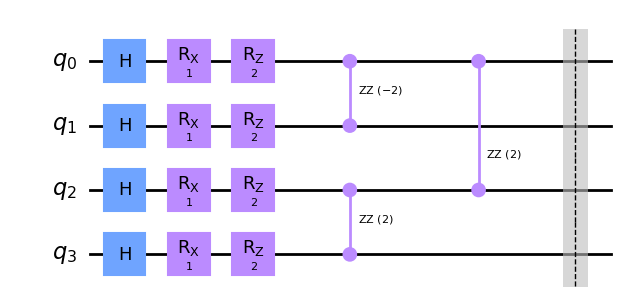

In [22]:
from qiskit import QuantumCircuit, transpile, assemble ,Aer
from qiskit.visualization import array_to_latex

num_qubits = 4
beta_1 = 1
gamma_1 = 2

circuit = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    circuit.h(i)

for i in range(num_qubits):
    circuit.rx(beta_1, i)

for i in range(num_qubits):
    circuit.rz(gamma_1, i)

circuit.rzz(-gamma_1, 0, 1)
circuit.rzz(gamma_1, 2, 3)
circuit.rzz(gamma_1, 0, 2)

circuit.barrier()

# Display the circuit
#array_to_latex(circuit)

# You can also use circuit.draw() to display the circuit as a text diagram
circuit.draw()

In [95]:
from qiskit import Aer, assemble, transpile, execute
from qiskit.visualization import array_to_latex
import numpy as np
num_qubits = 4
beta_1 = 1
gamma_1 = 2

circuit = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    circuit.h(i)

for i in range(num_qubits):
    circuit.rx(beta_1, i)

for i in range(num_qubits):
    circuit.rz(gamma_1, i)

circuit.rzz(-gamma_1, 0, 1)
circuit.rzz(gamma_1, 2, 3)
circuit.rzz(gamma_1, 0, 2)
circuit = circuit.reverse_bits()


# Transpile the circuit to execute on the Aer simulator

# Compile the circuit to obtain the equivalent matrix representation
backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()
# Obtain the equivalent matrix representation
matrix = result.get_unitary()

# Display the matrix representation
array_to_latex(matrix)

<IPython.core.display.Latex object>

In [96]:
import numpy as np
A = np.load("A.npy")
array_to_latex(A)


<IPython.core.display.Latex object>

In [97]:
np.array_equal(np.around(A,5),np.around(matrix,5))

True

In [29]:
np.array_equal(np.around(A,5), np.around(matrix,5))

True

In [82]:

num_qubits = 3
gamma_1 = 2

circuit = QuantumCircuit(num_qubits)


#circuit.rzz(-gamma_1, 0, 1)
#circuit.rzz(gamma_1, 2, 3)
circuit.rzz(gamma_1, 0, 1)

# Transpile the circuit to execute on the Aer simulator
circuit = circuit.reverse_bits()

# Compile the circuit to obtain the equivalent matrix representation
backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()
# Obtain the equivalent matrix representation
matrix = result.get_unitary()

# Display the matrix representation
array_to_latex(matrix)

<IPython.core.display.Latex object>

In [79]:
from scipy.linalg import expm

z = np.array([[1,0], [0,-1]])
rzz = expm(-1j * gamma_1/2 * np.kron(z,z))
array_to_latex(np.kron(rzz,np.eye(2)))

<IPython.core.display.Latex object>

In [50]:
from QAOA import _Rx,_Rz,_Rzz,_Rzzz,_Rzzzz,I,_H,getBaseProb
class PauliOperator(np.ndarray):
    """
    只实现了重写"+"为kron tensor, 懒得每次np.kron
    """
    def __new__(cls, input_array):
        obj = np.asarray(input_array).view(cls)
        return obj

    def __add__(self, other):
        return np.kron(self, other)
    
    def __mul__(self, other):
        return np.dot(self, other)

In [65]:

def _Rzz(ctro_b:int, obj_b:int, ndim:int, theta:float) -> PauliOperator:
    z = PauliOperator(np.array([[1,0],
            [0,-1]],dtype=np.complex128))
    if ctro_b == 0:
        mat_1 = PauliOperator(1)
    else:
        mat_1 = PauliOperator(np.eye(2**ctro_b,dtype=np.complex128))

    mat_2 = z +  PauliOperator(np.eye(2**(obj_b - ctro_b-1),dtype=np.complex128)) + z
    mat_3 = PauliOperator(np.eye(2**(ndim-obj_b-1),dtype=np.complex128))
    mat = mat_1 + mat_2 + mat_3
    return PauliOperator(expm(-1j*theta/2 * mat))
array_to_latex(_Rzz(0,1,3,gamma_1))

<IPython.core.display.Latex object>

In [46]:
np.kron(np.eye(2), rzz)

array([[0.54030231-0.84147098j, 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.54030231+0.84147098j,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.54030231+0.84147098j, 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.54030231-0.84147098j,
        0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0